In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import json
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('raw data/user_bitcoin.csv')
df.head()

,Random,NumLdPractices,DevID,DevName,DevSite,DevEmail,NumberFollowers,NumCommentedIssues,NumComments,NumCommits,NumPR,NumNonLd,SetLdPractices,LD1,LD2,LD3,LD4,LD5,LD6
0,0.018210,0,1087,jwilkins,https://github.com/jwilkins,jwilkins@bitland.net,145,1,1,0,1,1,{},0,0,0,0,0,0
1,0.502486,0,1224,awt,https://github.com/awt,adam.thorsen@gmail.com,8,1,1,0,0,1,{},0,0,0,0,0,0
2,0.478633,5,1945,casey,https://github.com/casey,casey@rodarmor.com,199,7,10,15,15,5,"{'LD4': 2, 'LD3': 1, 'LD5': 1, 'LD6': 1}",0,0,1,2,1,1
3,0.189422,0,2623,copumpkin,https://github.com/copumpkin,NaN,551,1,1,0,0,1,{},0,0,0,0,0,0
4,0.211545,14,2734,eklitzke,https://github.com/eklitzke,evan@eklitzke.org,664,13,21,22,27,7,"{'LD4': 3, 'LD1': 10, 'LD6': 1}",10,0,0,3,0,1


In [3]:
feature_df = df[['NumberFollowers', 'NumCommentedIssues', 'NumComments', 'NumCommits', 'NumPR', 'NumNonLd']]
feature_df

,NumberFollowers,NumCommentedIssues,NumComments,NumCommits,NumPR,NumNonLd
0,145,1,1,0,1,1
1,8,1,1,0,0,1
2,199,7,10,15,15,5
3,551,1,1,0,0,1
4,664,13,21,22,27,7
...,...,...,...,...,...,...
1665,0,1,1,0,0,1
1666,0,1,1,0,0,1
1667,0,1,1,0,0,1
1668,0,1,3,0,0,1


In [4]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(feature_df)
unique, counts = np.unique(label, return_counts=True)
dict(zip(unique, counts))

{0: 1667, 1: 3}

In [5]:
cluster1 = feature_df[label == 0]
cluster2 = feature_df[label == 1]

In [6]:
cluster1

,NumberFollowers,NumCommentedIssues,NumComments,NumCommits,NumPR,NumNonLd
0,145,1,1,0,1,1
1,8,1,1,0,0,1
2,199,7,10,15,15,5
3,551,1,1,0,0,1
4,664,13,21,22,27,7
...,...,...,...,...,...,...
1665,0,1,1,0,0,1
1666,0,1,1,0,0,1
1667,0,1,1,0,0,1
1668,0,1,3,0,0,1


In [7]:
cluster2

,NumberFollowers,NumCommentedIssues,NumComments,NumCommits,NumPR,NumNonLd
119,2893,1921,3499,6849,881,1960
305,2281,948,1494,1881,741,957
988,732,1302,2238,3573,1221,1172


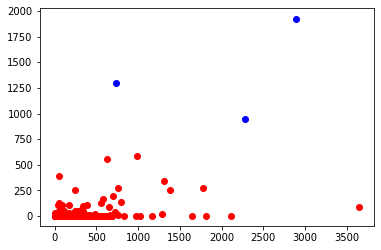

In [8]:
plt.scatter(cluster1.iloc[:,0] , cluster1.iloc[:,1] , color = 'red')
plt.scatter(cluster2.iloc[:,0] , cluster2.iloc[:,1] , color = 'blue')
plt.show()

In [9]:
regularized_df = df[['NumberFollowers', 'NumCommentedIssues', 'NumComments', 'NumCommits', 'NumPR', 'NumNonLd', 'SetLdPractices']]
regularized_df

,NumberFollowers,NumCommentedIssues,NumComments,NumCommits,NumPR,NumNonLd,SetLdPractices
0,145,1,1,0,1,1,{}
1,8,1,1,0,0,1,{}
2,199,7,10,15,15,5,"{'LD4': 2, 'LD3': 1, 'LD5': 1, 'LD6': 1}"
3,551,1,1,0,0,1,{}
4,664,13,21,22,27,7,"{'LD4': 3, 'LD1': 10, 'LD6': 1}"
...,...,...,...,...,...,...,...
1665,0,1,1,0,0,1,{}
1666,0,1,1,0,0,1,{}
1667,0,1,1,0,0,1,{}
1668,0,1,3,0,0,1,"{'LD3': 1, 'LD1': 1}"


In [24]:
leaderList = []
for obj in regularized_df['SetLdPractices']:
    tempDict = json.loads(obj.replace('\'', '\"'))
    leaderSum = 0
    for key, value in tempDict.items():
        leaderSum += value
    leaderList.append(leaderSum)

In [26]:
regularized_df['leaderList'] = leaderList

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
regularized_df['regularLeaderList'] = MinMaxScaler().fit_transform(np.array(regularized_df['leaderList']).reshape(-1,1))
regularized_df = regularized_df.drop(columns=['SetLdPractices', 'leaderList'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
regularized_df.iloc[:,:-1]

,NumberFollowers,NumCommentedIssues,NumComments,NumCommits,NumPR,NumNonLd
0,145,1,1,0,1,1
1,8,1,1,0,0,1
2,199,7,10,15,15,5
3,551,1,1,0,0,1
4,664,13,21,22,27,7
...,...,...,...,...,...,...
1665,0,1,1,0,0,1
1666,0,1,1,0,0,1
1667,0,1,1,0,0,1
1668,0,1,3,0,0,1


In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(regularized_df.iloc[:,:-1], regularized_df.iloc[:,-1], test_size=0.33, random_state=42)

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    print(mean_absolute_error(X_test, clf.predict(X_test)), '\n')
#     print(clf.predict(X_test),'\n')

SVR()


ValueError: y_true and y_pred have different number of output (6!=1)